# **Banknote Authentication Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import sklearn.svm as svm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D, axes3d # For 3d plots
# import mglearn


# **Importing Data**

In [ ]:
# Getting data from UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header = None)

# Target Variable: class 0 is “genuine/authentic” and class 1 is “forgery/fake”
df = df.rename(columns={0: "Variance", 1: "Skewness", 2: "Kurtosis", 3: "Entropy", 4: "Target"})

# Breaking target values off into their own vector
# Converting to NumPy arrays for use in classification algorithms
X = df[["Variance", "Skewness", "Kurtosis", "Entropy"]]
y = df[["Target"]]
X = X.to_numpy()
y = y.to_numpy()

df

,Variance,Skewness,Kurtosis,Entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# **Exploratory Data Analysis**

In [ ]:
# Min/Max values of each variable
print(df.min())
print(df.max())

Variance    -7.0421
Skewness   -13.7731
Kurtosis    -5.2861
Entropy     -8.5482
Target       0.0000
dtype: float64
Variance     6.8248
Skewness    12.9516
Kurtosis    17.9274
Entropy      2.4495
Target       1.0000
dtype: float64


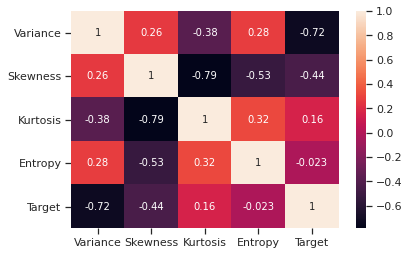

In [ ]:
# Creating correlation plot to identify good predictors
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

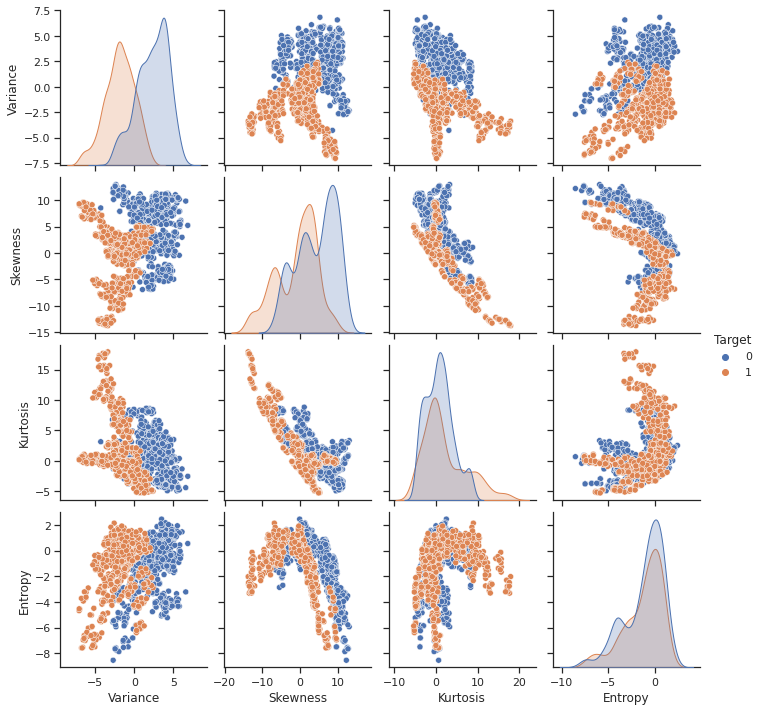

In [ ]:
# Creating Scatterplot Matrix to see feature relationships
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Target")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


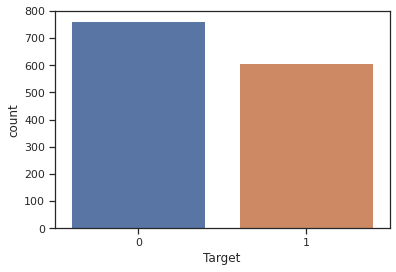

In [ ]:
#Analysis test on target variable
sns.countplot(df["Target"])

#Target feature is balanced because the number of values of 0 and 1 do not differ very much 

# **Logistic Regression**

In [ ]:
# Splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating LogReg classifier object, training on feature values in training set
lrclf = LogisticRegression(random_state=0).fit(X_train, y_train.ravel())
lrclf.predict(X_test[:2, :])
lrclf.predict_proba(X_test[:2, :])

# Creating vector of predicted values under the LogReg logic 
lrpred = lrclf.predict(X_test)


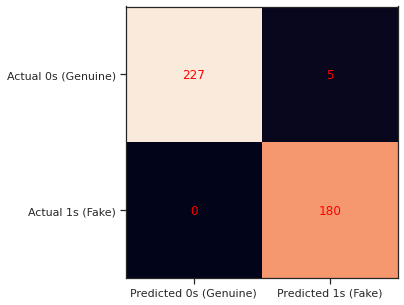

In [ ]:
# Creating confusion matrix from LogReg results
cm = metrics.confusion_matrix(y_test, lrclf.predict(X_test))

# Showing confusion matrix with fancy colors
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s (Genuine)', 'Predicted 1s (Fake)'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s (Genuine)', 'Actual 1s (Fake)'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- True Negatives: 227 (correctly identified as real - successful (True Accept))
- False Negatives: 0 (falsely identified as real - counterfeit money accepted (False Accept))
- False Positives: 5 (falsely identified as fake - genuine money turned down (False Reject))
- True Postivies: 180 (correctly identified as fake - successful (True Reject))

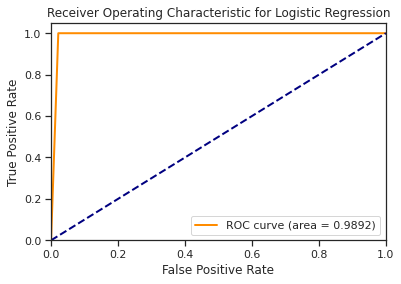

Score: 0.9878640776699029
Accuracy Score: 0.9878640776699029
Recall Score: 1.0
Precision Score: 0.972972972972973
F1-Score: 0.9863013698630138
[[227   5]
 [  0 180]]


In [ ]:
# Creating ROC curve and calculating AUC with LogReg predictions
lrfpr, lrtpr, _ = metrics.roc_curve(y_test, lrclf.predict(X_test))
lrroc_auc = metrics.auc(lrfpr, lrtpr)

# Plotting ROC Curve with AUC in legend
plt.figure()
lw = 2
plt.plot(lrfpr, lrtpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % lrroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Printing evaluation metrics and confusion matrix for LogReg classifier
print("Score:", lrclf.score(X_test, y_test))
print("Accuracy Score:", metrics.accuracy_score(y_test, lrpred))
print("Recall Score:", metrics.recall_score(y_test, lrpred))
print("Precision Score:", metrics.precision_score(y_test, lrpred))
print("F1-Score:", metrics.f1_score(y_test, lrpred))
print(metrics.confusion_matrix(y_test, lrclf.predict(X_test)))

# **Random Forest**

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creating random forest object and fitting it to the trainign set
rfclf=RandomForestClassifier(n_estimators=100)
rfclf.fit(X_train,y_train.ravel())

# Creating vector of predictons from RF model
rf_y_pred=rfclf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test.ravel(), rf_y_pred.ravel()))

Accuracy: 0.9927184466019418


In [ ]:
# Calculating feature importances and sorting the categories accordingly
c = ["Variance", "Skewness", "Kurtosis", "Entropy"]
feature_imp = pd.Series(rfclf.feature_importances_,index=c).sort_values(ascending=False)

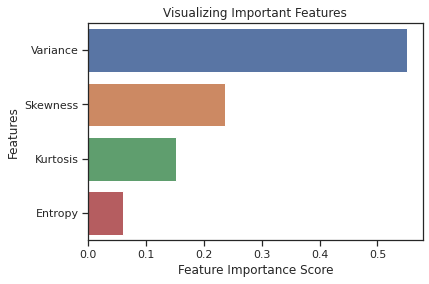

In [ ]:
# Plotting feature importance in RF model
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

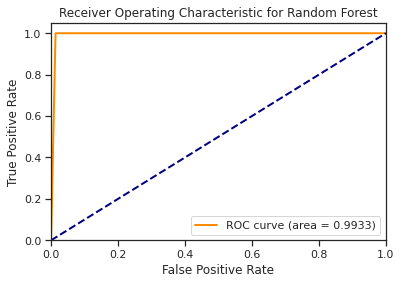

Score: 0.9927184466019418
Accuracy Score: 0.9927184466019418
Recall Score: 1.0
Precision Score: 0.9842105263157894
F1-Score: 0.9920424403183024


array([[222,   3],
       [  0, 187]])

In [ ]:
# Creating ROC curve and calculating AUC with Random Forest predictions
rffpr, rftpr, _ = metrics.roc_curve(y_test, rf_y_pred)
rfroc_auc = metrics.auc(rffpr, rftpr)

# Plotting ROC Curve for RF model with AUC in legend
plt.figure()
lw = 2
plt.plot(rffpr, rftpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % rfroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Printing evaluation metrics and confusion matrix for random forest
print("Score:", rfclf.score(X_test, y_test))
print("Accuracy Score:", metrics.accuracy_score(y_test.ravel(), rf_y_pred.ravel()))
print("Recall Score:", metrics.recall_score(y_test, rf_y_pred))
print("Precision Score:", metrics.precision_score(y_test, rf_y_pred))
print("F1-Score:", metrics.f1_score(y_test, rf_y_pred))
metrics.confusion_matrix(y_test, rfclf.predict(X_test))

# **Kernel SVM**

##Plotting

This code block makes a 3-D scatter for the features (Variance, Skewness, Kurtosis). It's commented out since mglearn isn't installed natively on colab, so just run on a local environment to produce the plot.

In [ ]:
# figure = plt.figure()

# ax = Axes3D(figure)

# mask = y == 0
# mask = y == 0
# ax.scatter(df[mask]["Variance"], df[mask]["Skewness"], df[mask]["Kurtosis"], c='b',
#            cmap=mglearn.cm2, s=60, edgecolor='k')
# ax.scatter(df[~mask]["Variance"], df[~mask]["Skewness"], df[~mask]["Kurtosis"], c='r', marker='^',
#            cmap=mglearn.cm2, s=60, edgecolor='k')
# ax.set_xlabel("Variance")
# ax.set_ylabel("Skewness")
# ax.set_zlabel("Kurtosis")
# plt.show()

# figure = plt.figure()

##Model training

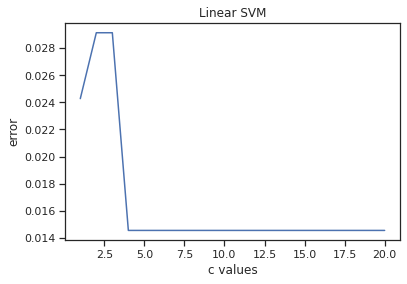

In [ ]:
# For the test split
x_temp, X_test, y_temp, y_test = train_test_split(X, y.ravel(), test_size=0.5)

# For the training / Validation splits

X_train, X_Val, y_train, y_Val = train_test_split(x_temp, y_temp.ravel(), test_size = 0.3, random_state = 0)

#Different C testing just like in HW
c_range =  range(1, 21)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=X_train, y=y_train)
    error = 1. - model.score(X_Val, y_Val)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
plt.show()

# In running this multiple times, it seems like 4-7 consistently does relatively well.

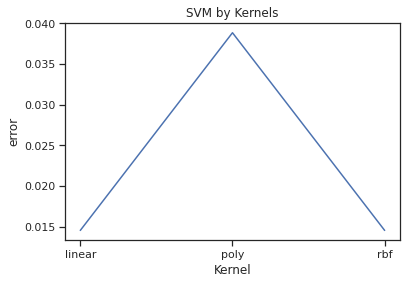

In [ ]:
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    model = svm.SVC(kernel=kernel_value, C=4)
    model.fit(X=X_train, y=y_train)
    error =  1. - model.score(X_Val, y_Val)
    svm_kernel_error.append(error)
plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()

# Pretty decisive here that rbf is the best.

Model testing & metrics

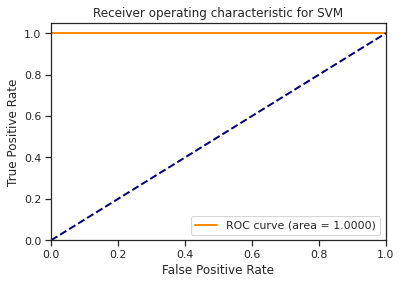

Score: 0.9985422740524781
Accuracy Score: 0.9985422740524781
Recall Score: 1.0
Precision Score: 0.9966329966329966
F1-Score: 0.9983136593591906


array([[389,   1],
       [  0, 296]])

In [ ]:
# Using the best parameters for SVM model creation
best_kernel = 'rbf'
best_c = 4
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=X_train, y=y_train)

# Fitting
pred = model.predict(X_test)
prob = model.decision_function(X_test)

# ROC
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

# Evaluation metrics
print("Score:", model.score(X_test, y_test))
print("Accuracy Score:", metrics.accuracy_score(y_test, pred))
print("Recall Score:", metrics.recall_score(y_test, pred))
print("Precision Score:", metrics.precision_score(y_test, pred))
print("F1-Score:", metrics.f1_score(y_test, pred))
metrics.confusion_matrix(y_test, model.predict(X_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### K Nearest Neighbors 

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header = None)

# Target Variable: class 0 is “genuine/authentic” and class 1 is “forgery/fake”
df = df.rename(columns={0: "Variance", 1: "Skewness", 2: "Kurtosis", 3: "Entropy", 4: "Target"})

X = df[["Variance", "Skewness", "Kurtosis", "Entropy"]]
y = df[["Target"]]
X = X.to_numpy()
y = y.to_numpy()

df

,Variance,Skewness,Kurtosis,Entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
df.head(10)

,Variance,Skewness,Kurtosis,Entropy,Target
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1097, 4)
y_train shape: (1097, 1)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (275, 4)
y_test shape: (275, 1)


In [ ]:
#Fit the model 
y_train=np.ravel(y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
#Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
#Predictions
y_pred = classifier.predict(X_test)

In [ ]:
#Test accuracy 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.9818181818181818


In [ ]:
#Making predictions
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)

Prediction: [0]


In [ ]:
#evaluating the model
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0]


Maximum accuracy:- 1.0 at K = 0


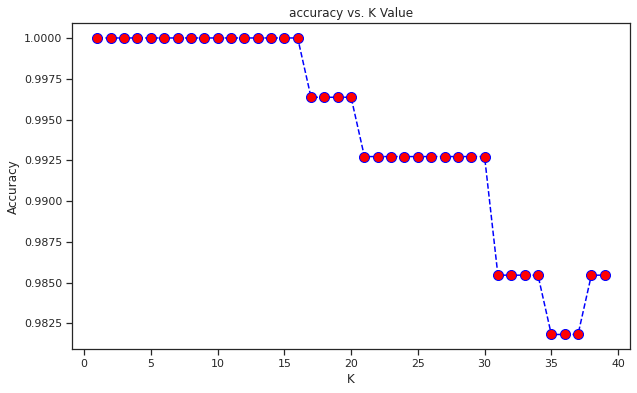

In [ ]:
acc = []
# Finding the right K Value 
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


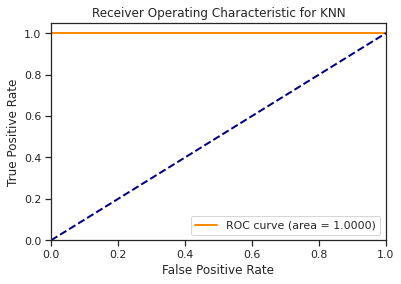

Score: 0.9818181818181818
Accuracy Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
F1-Score: 1.0


array([[135,   5],
       [  0, 135]])

In [ ]:
# Creating ROC curve and calculating AUC with KNN predictions
knnfpr, knntpr, _ = metrics.roc_curve(y_test, y_pred)
knnroc_auc = metrics.auc(knnfpr, knntpr)

# Plotting ROC Curve for RF model with AUC in legend
plt.figure()
lw = 2
plt.plot(knnfpr, knntpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % knnroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

# Printing evaluation metrics and confusion matrix for random forest
print("Score:", classifier.score(X_test, y_test))
print("Accuracy Score:", metrics.accuracy_score(y_test.ravel(), y_pred.ravel()))
print("Recall Score:", metrics.recall_score(y_test, y_pred))
print("Precision Score:", metrics.precision_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
metrics.confusion_matrix(y_test, classifier.predict(X_test))